#  Homework 6
## MBIO612
### Gabrielle Martineau

In [1]:
#Set working directory
setwd("~/U_of_H/FALL_2021/MBIO612/Week_7")

#download necessary libraries
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.1 --
v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


## Ex 1

In [2]:

############
####EXO 1###
############

#generate 2 distributions of 5 samples from the same population, that follows a normal distribution
set.seed(110)
data_1 = tibble(measure=rnorm(5, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(5, 10, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)
complete_data

#compute the mean of each site
mean(complete_data[complete_data$site_name == "Site 1", ]$measure)
mean(complete_data[complete_data$site_name == "Site 2", ]$measure)

#Use tapply to do the same
tapply(complete_data$measure, complete_data$site_name, mean)

measure,site_name
10.291195,Site 1
11.388863,Site 1
10.649010,Site 1
11.477876,Site 1
10.438720,Site 1
10.522318,Site 2
9.955392,Site 2
11.484413,Site 2
8.408989,Site 2
10.225640,Site 2


[1] 10.84913

[1] 10.11935

Site 1   Site 2 
10.84913 10.11935

## Ex 2

[1] -0.3472111

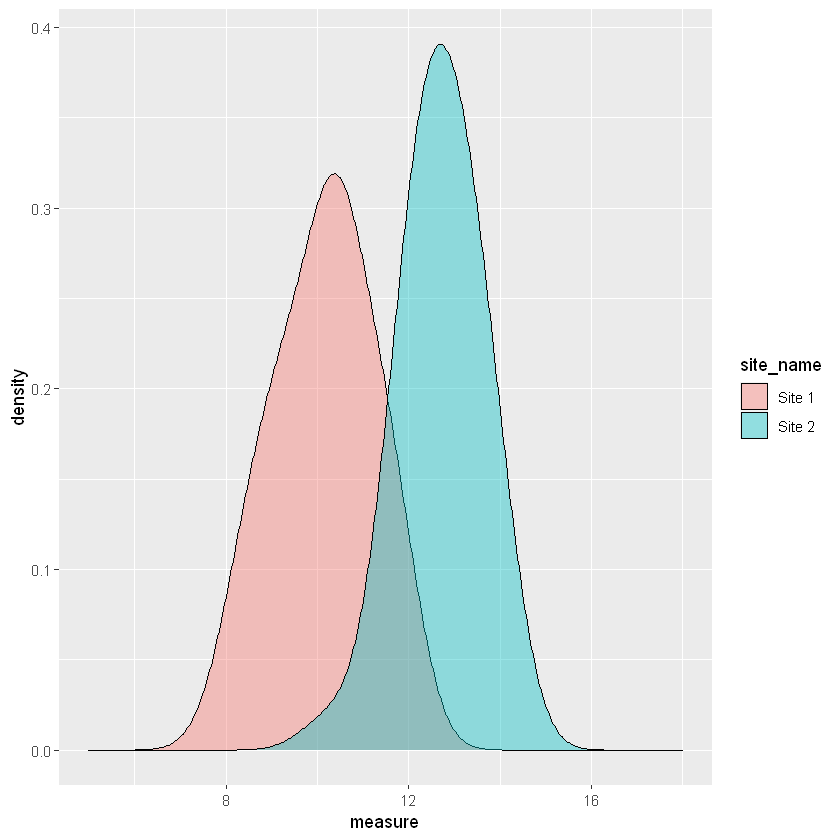

[1] -2.553808

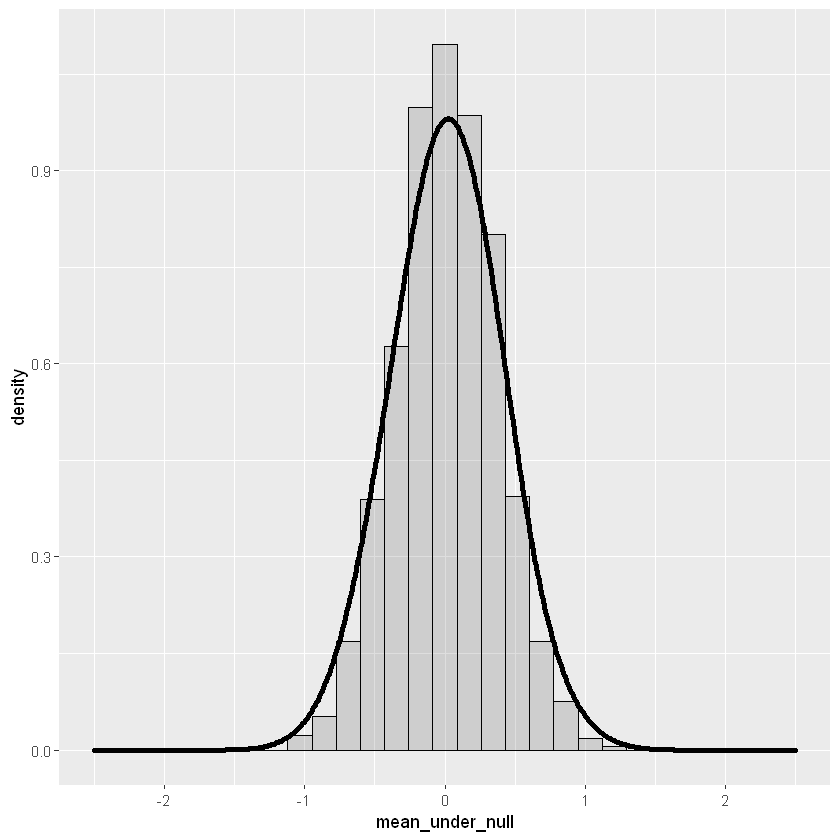

[1] 0

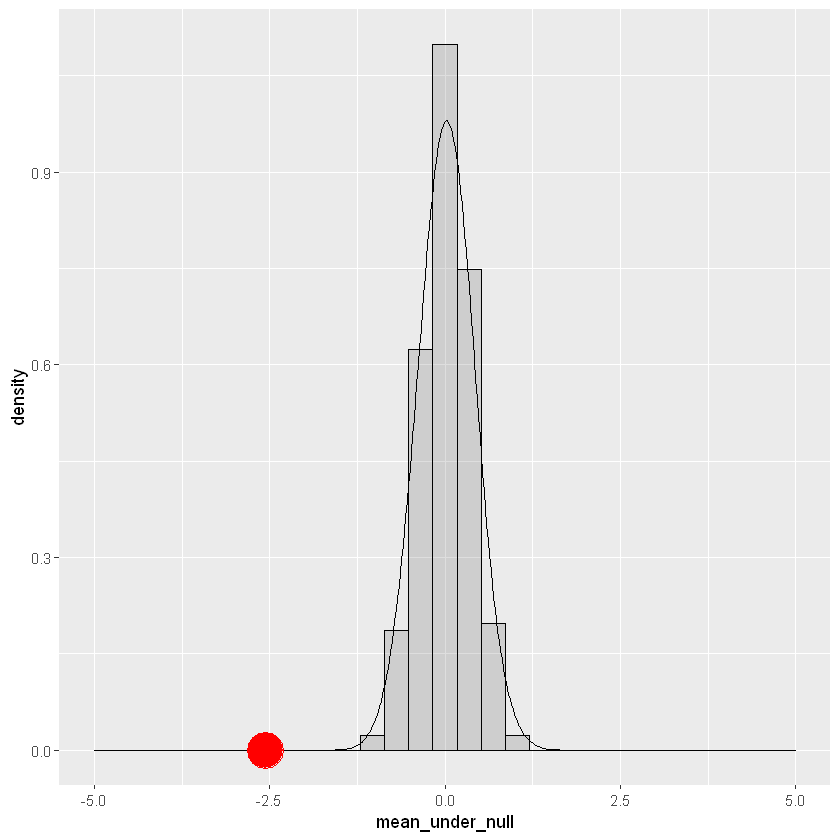

In [3]:
############
####EXO 2###
############

#Generate the data
set.seed(110)
data_1 = tibble(measure=rnorm(40, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(40, 13, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)

#Plot two distributions
ggplot(complete_data, aes(x=measure, fill = site_name)) + 
  geom_density(alpha = 0.4, bw =0.60) + 
  xlim(5,18)

#generate the distribution if H0 is true
#concatenate and shuffle vectors, split and find the diff in mean
processOneIter = function(data_1, data_2){
  
  concat_data = c(data_1, data_2)
  len_concat_data = length(concat_data)
  
  len_data_1 = length(data_1)    
  shuffled_data = sample(concat_data)
  new_data_1 = shuffled_data[1:len_data_1]
  new_data_2 = shuffled_data[(len_data_1+1):len_concat_data]
  mean(new_data_1) - mean(new_data_2)
  
}
processOneIter(data_1$measure, data_2$measure)

#Repeat many times to have a vector of differences in mean
mean_under_null = replicate(1000, processOneIter(data_1$measure, data_2$measure))

#Plot the null distribution 
ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null), bw=0.2, size=1.5) + 
  xlim(-2.5, 2.5)

#Compare our observed value to the null
observed_value = mean(data_1$measure) - mean(data_2$measure)
observed_value

#Add our observed value to the distribution
ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null), bw=0.2, size=0.5) + 
  xlim(-5, 5) + 
  geom_point(aes(observed_value, 0), color="red", size=10)

#compute p-value
sum(mean_under_null < observed_value) / length(mean_under_null)

As observed on the last graphic, the difference between our observed value and the distribution that is true under the null hypothesis is so drastic that it can't be due to chance alone: our observed value has to come from a different distribution.
Our p-value also confirms those findings (p= 0), which means that the probability that the difference in means between our two distributions is 0 is pretty much 0.

## Ex 3

kind,ratios,method
P. lobata,0.60,known
M. capitata,0.61,re-sampled
P. mendrina,0.19,known
P. lobata,0.19,re-sampled
M. capitata,0.21,known
P. mendrina,0.20,re-sampled


[1] 0.035

[1] 0.41

[1] 0

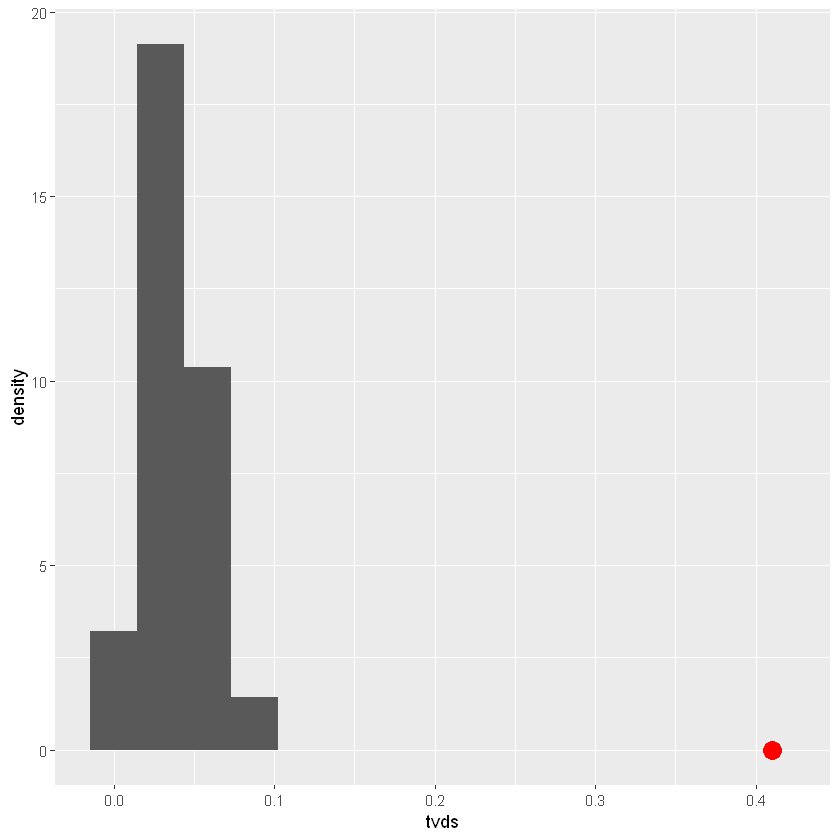

In [6]:
############
####EXO 3###
############

#create tible of observed values

kind = rep(c('P. lobata', 'M. capitata', 'P. mendrina'),2)
ratios = c(0.60, 0.61, 0.19, 0.19, 0.21, 0.20)
method = rep(c("known", "re-sampled"), 3)
coral_proportions= tibble(kind, ratios, method)
coral_proportions


corals <- sample(c('P. lobata', 'M. capitata', 'P. mendrina '), 200, replace=TRUE, prob=c(0.61, 0.19, 0.20))

#generate a random sample using the multinomial distributions and the observed proportions
sampleOneIteration = function(){
  true_proportions = c(0.60, 0.19, 0.21)
  sample_proportions = rmultinom(1, 200, prob=c(0.61, 0.19, 0.21))/200
  sample_tvd = sum(abs(true_proportions- sample_proportions))/2
  sample_tvd
  
}
sampleOneIteration()

#Compute and store the sample tvd to build the background distribution
tvds = replicate(1000, sampleOneIteration())

#Create function to compute TVD
subtract_abs = function(x){
  abs(x[1] - x[2])
}

#Measure TVDS of observed value
observed_stat = sum(tapply(coral_proportions$ratios, coral_proportions$kind, subtract_abs))/2
observed_stat


#Compare the observed value against the data simulated under the null hypothesi
ggplot()+ 
  geom_histogram(aes(tvds, ..density..), bins = 15) +
  geom_point(aes(observed_stat, 0), size=5, color="red")

#compute p-value
p_value = sum(tvds > observed_stat)  / length(tvds)
p_value

As observed on the last graphic, the difference between our observed value and the distribution that is true under the null hypothesis is so drastic that it can't be due to chance alone: our observed value has to come from a different distribution.
Our p-value also confirms those findings (p= 0), which means that the probability that the total variation distance of our two distributions is 0 is pretty much 0.